In [1]:
#Most of the work will be done in numpy, but pandas for data reading and matplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the csv, and tranform into numpy matrix
Data=pd.read_csv("train.csv")
Data=np.matrix(Data)

In [3]:
rownum=Data.shape[0]

In [4]:
#Row indices do not matter in this case, so the easiest way to random sample is to shuffle the rowes
np.random.shuffle(Data)

In [5]:
#Get the size of the training, test, and validation sets, so that I can split them evenly
#Percent of data in train
tr_ratio=.7
#Size of validation set
val_ratio=(1-tr_ratio)/2
#Size of test
tst_ratio=1-tr_ratio-val_ratio
tr_len=int(rownum*tr_ratio)
v_len=int(rownum*val_ratio)
tst_len=int(rownum*tst_ratio)
#See if any were left over in rounding
leftover=rownum-(tr_len+v_len +tst_len)

In [6]:
#Add the leftover to train. Decided to take the last tr_len rows, could take the first intead,
#as the rows where randomly reorderd
#Up to this point, the program is completely generalized, now it specificall takes data where 
#the last column is the dependent variable
X_train=Data[-(leftover+tr_len):,:-1]
y_train=Data[-(leftover+tr_len):,-1]

#Take The first v_test rows 
X_val=Data[:v_len,:-1]
y_val=Data[:v_len:,-1]

#Take the remaining
X_test=Data[v_len:v_len+tst_len,:-1]
y_test=Data[v_len:v_len+tst_len,-1]
#Make sure I am using all of the rows of data, no duplicates or missed rows
print(len(y_train)+len(y_val)+len(y_test)-rownum)

0


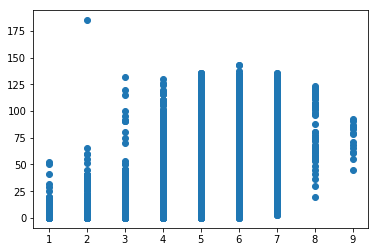

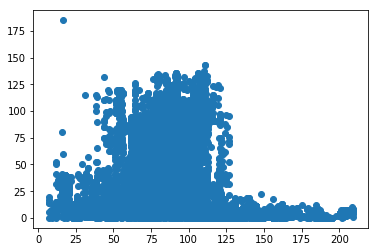

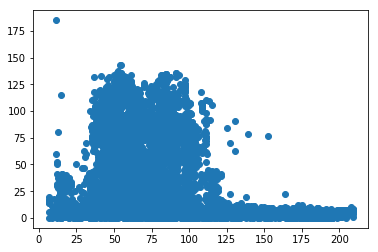

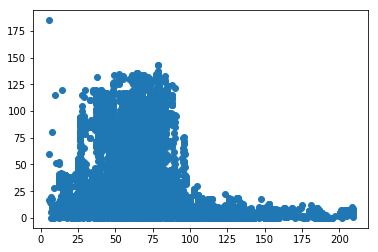

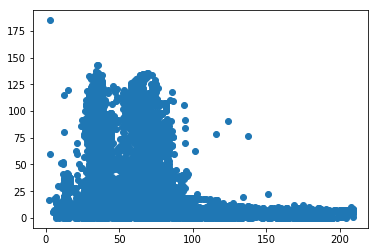

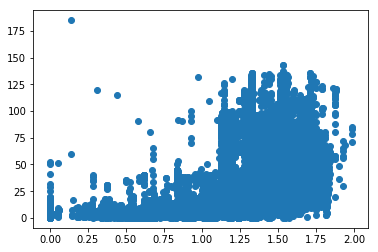

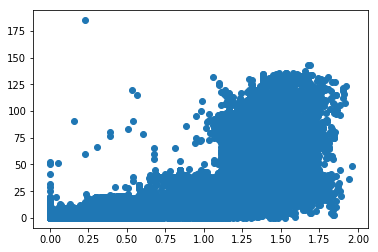

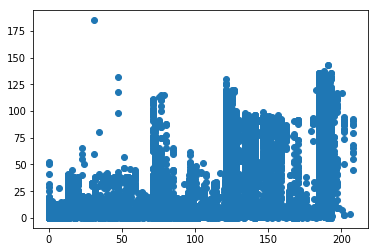

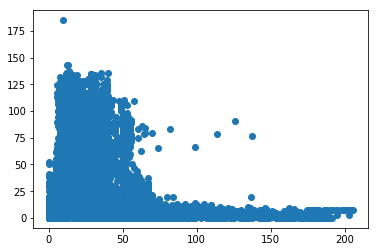

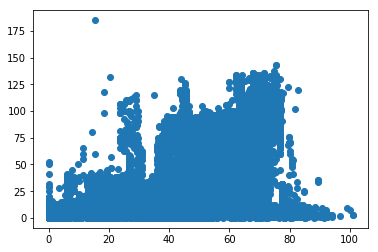

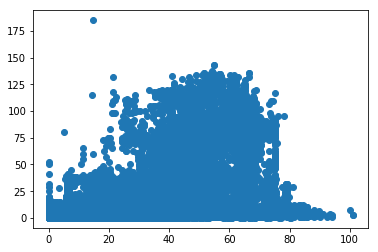

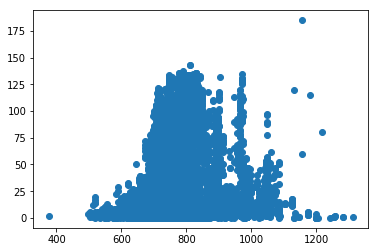

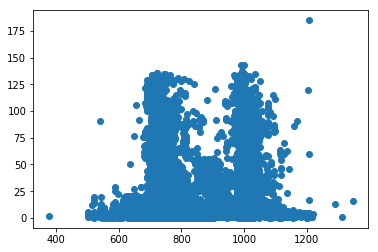

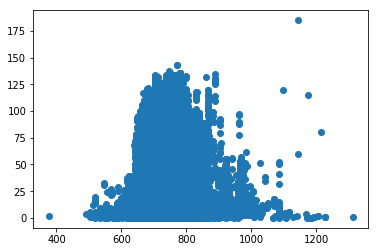

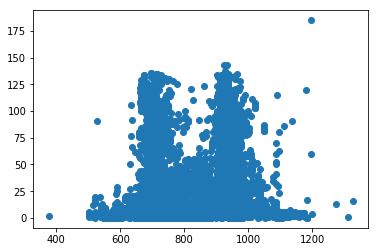

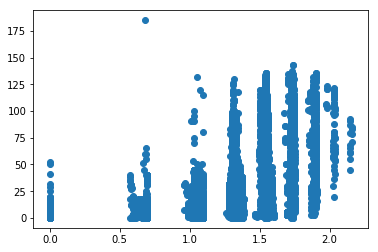

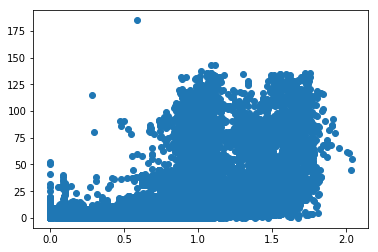

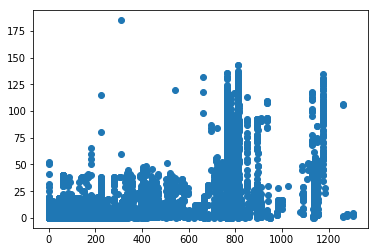

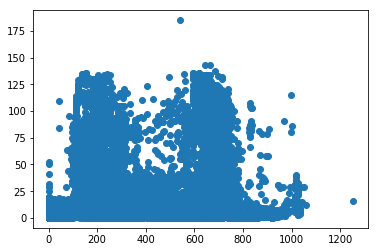

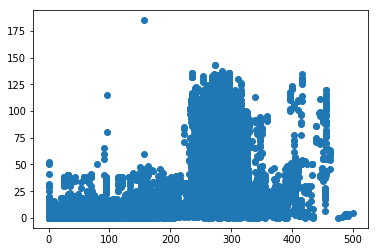

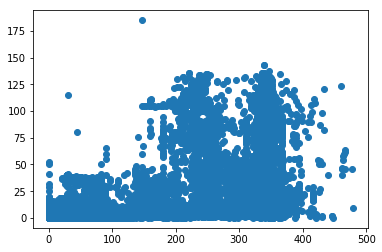

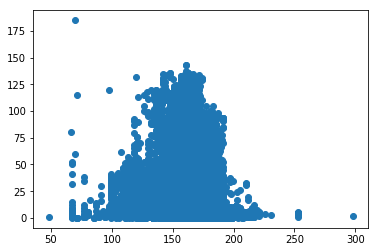

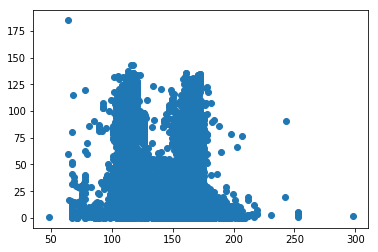

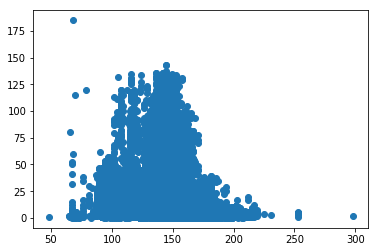

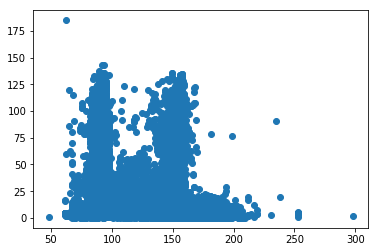

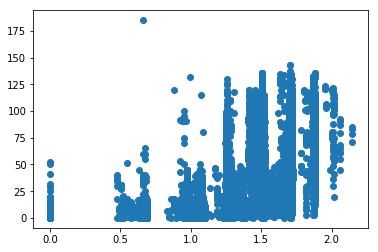

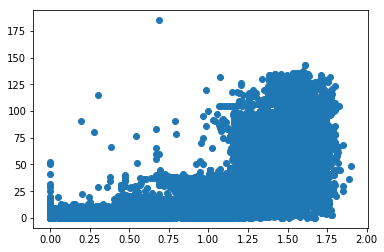

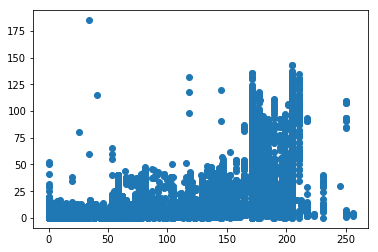

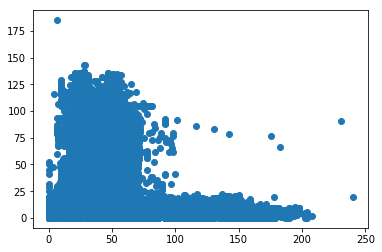

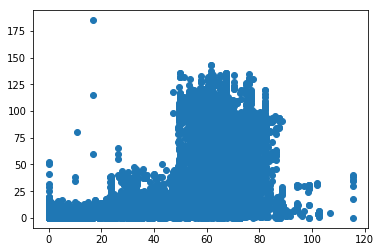

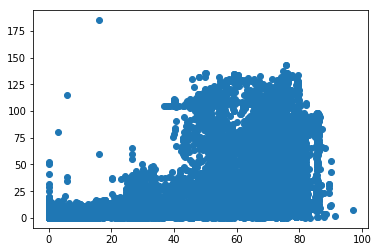

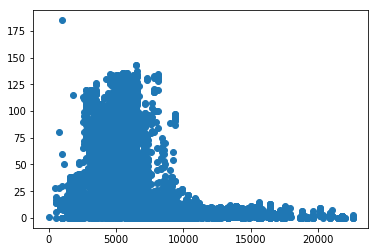

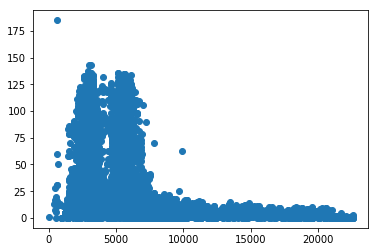

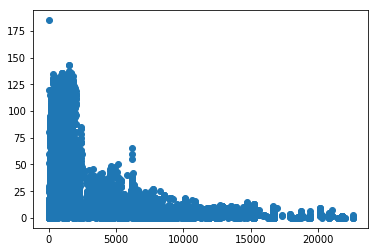

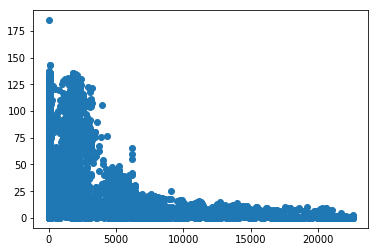

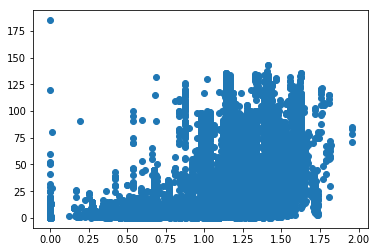

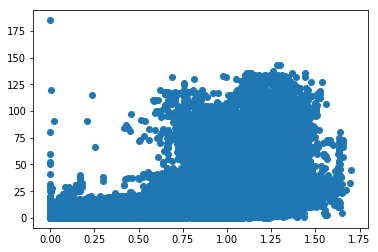

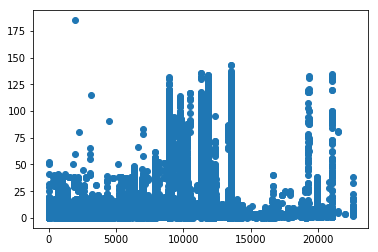

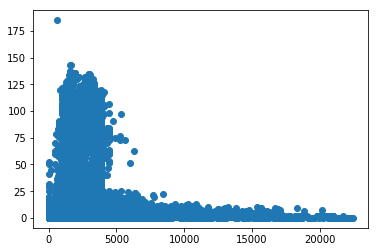

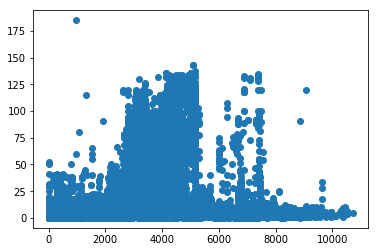

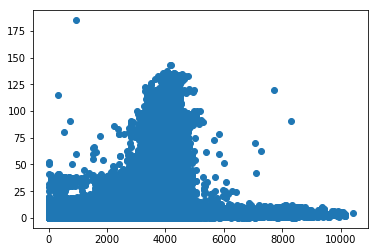

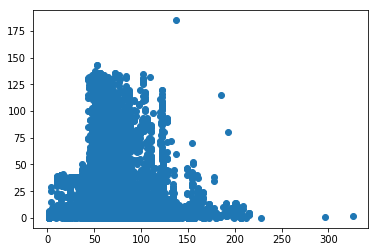

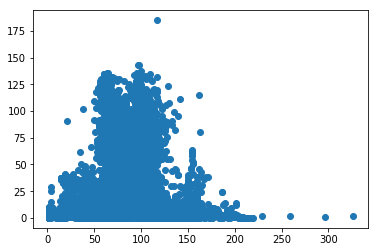

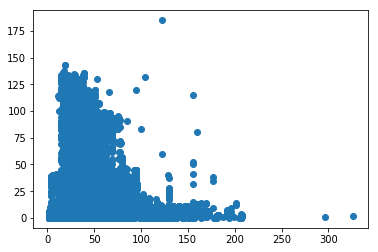

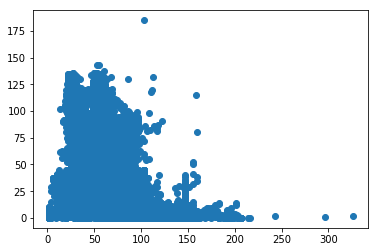

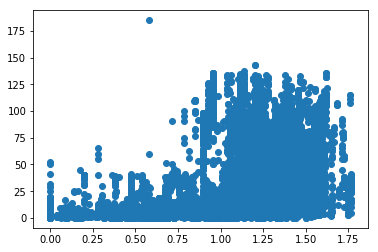

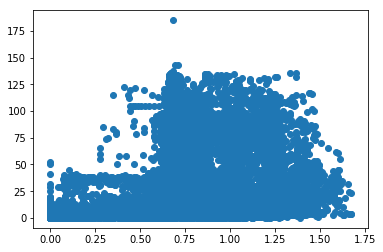

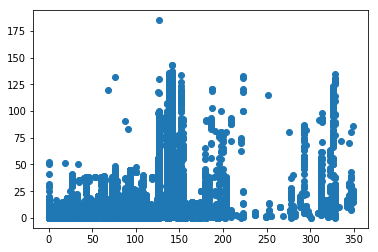

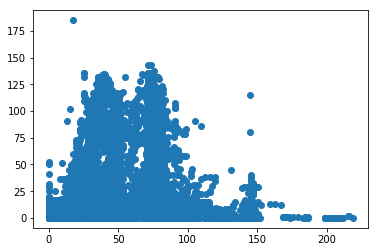

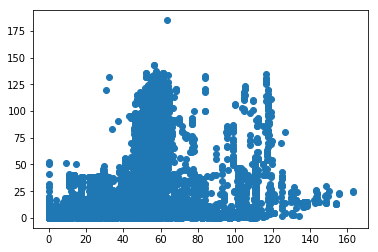

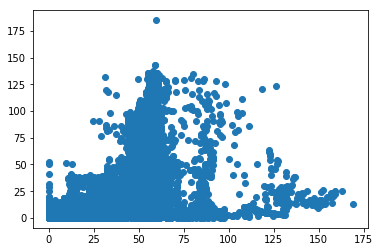

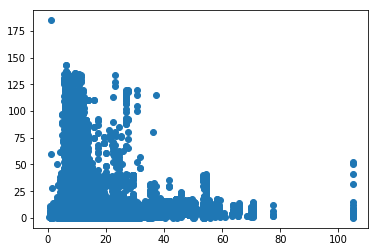

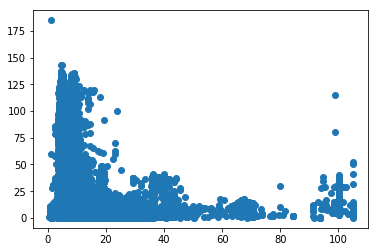

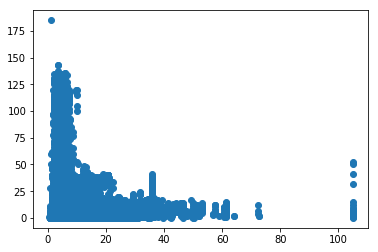

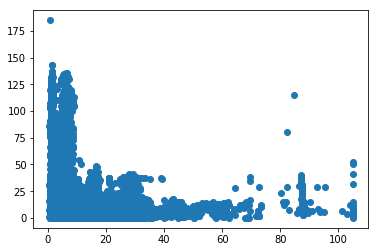

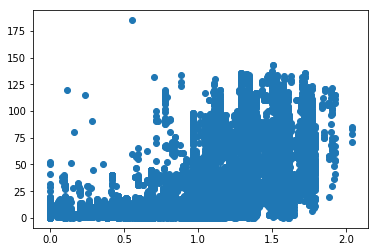

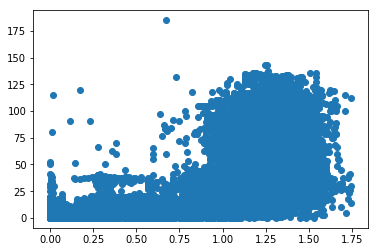

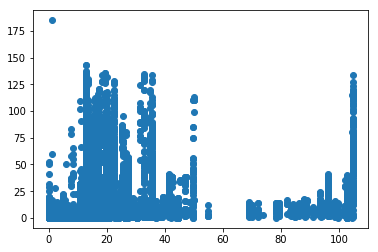

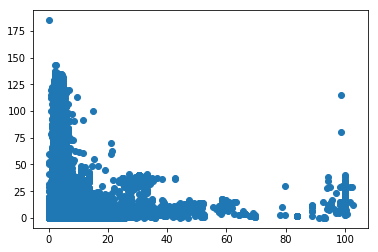

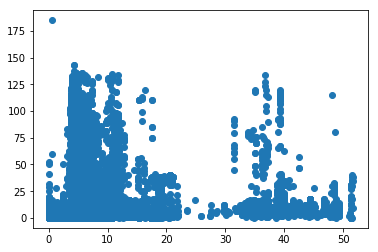

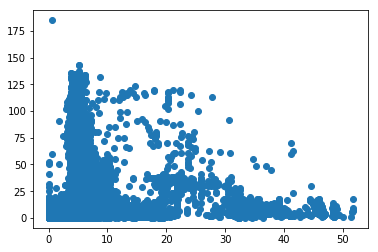

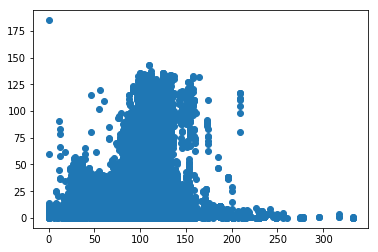

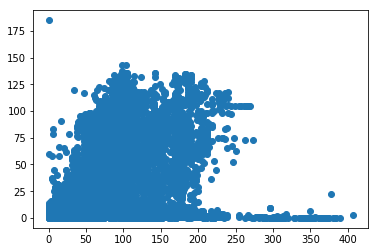

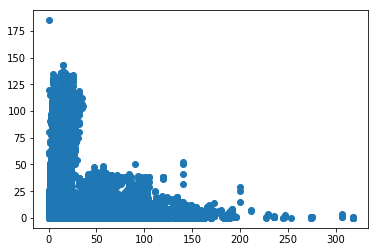

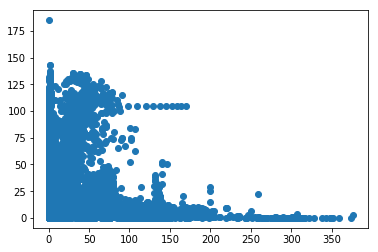

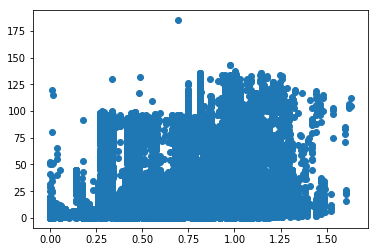

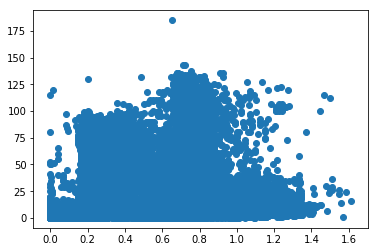

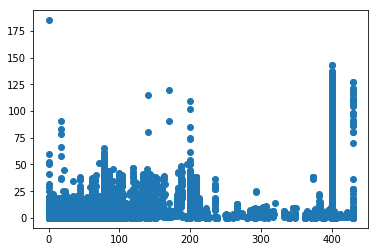

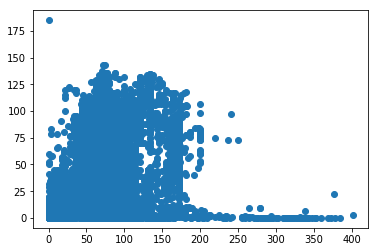

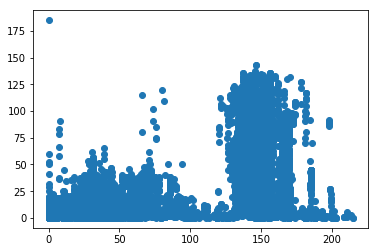

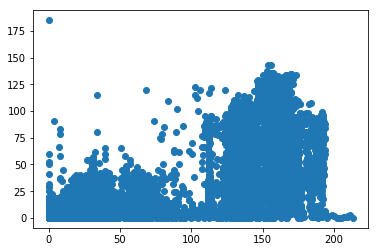

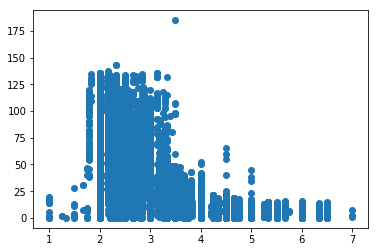

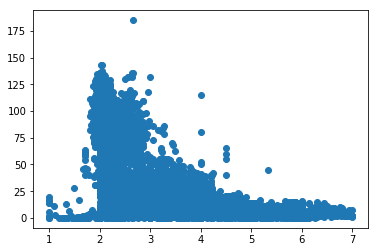

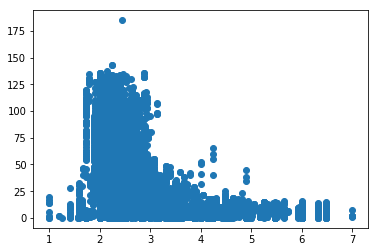

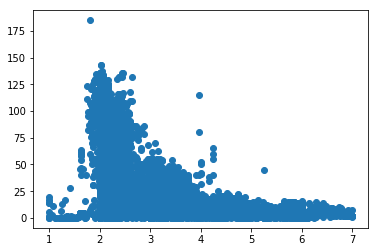

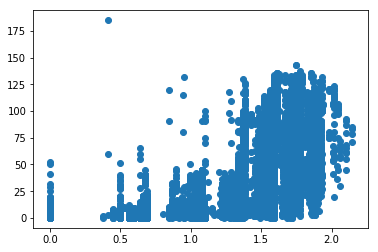

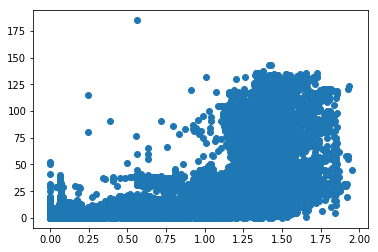

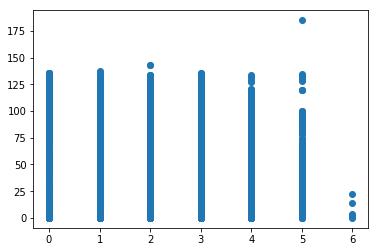

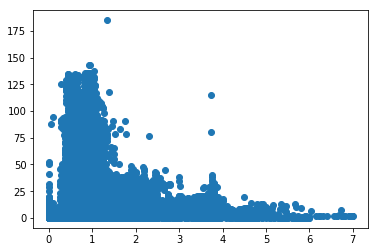

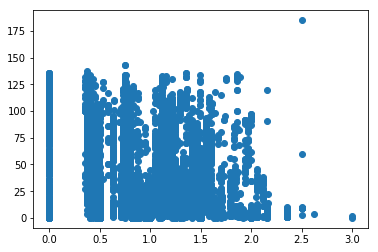

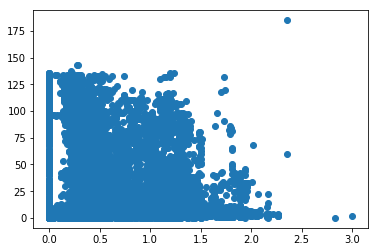

In [7]:
# Plot the data to see the form
# They look pretty close to sums of gaussians, so that is where I will start when formulating phi
for i in range(X_train.shape[1]):
    plt.scatter([Data[:,i]],[Data[:,-1]])
    plt.show()

In [10]:
#Find index of second largest value of crit_temp, as largest is an outlier, according to above graphs. Used as center of gaussian
gs_center=np.array(y_train.reshape(1,y_train.shape[0])).argsort()[0,-2]

In [11]:
def phi(X):
    phi=np.ones((X.shape[0],1))
    #Create matrix where each row is X values at the max y. Will be used for creating the desired gaussian radial functions 
    centermat=np.tile(X_train[gs_center],(X.shape[0],1))
    for i in range(5):
        #Trig functions seem to deall well with the fluctuations, 
        #while the polynomials give the fit a way to more easily deal with the fact that the data is not periodic
        phi=np.hstack((phi,np.sin((i+1)*X), np.cos((i+1)*X),np.power(X,i+1)))
    #Fitting with just guassians did not work well, though adding onw in does imporive the fit.
    phi=np.hstack((phi,np.exp(-np.power((X-centermat)/2/centermat,2))))
    return phi

In [12]:
#Find phi for all three sets
phi_tr=phi(X_train)
phi_val=phi(X_val)
phi_test=phi(X_test)

In [11]:
lmd=.0005
Error=[]
for i in range(9):
    w=np.linalg.inv(phi_tr.T@phi_tr+(lmd*(i+1))*np.identity(phi_tr.shape[1]))@phi_tr.T@y_train
    y_pred=phi_val@w
    Error.append((lmd*(i+1),np.median(np.array(abs((y_val-y_pred)/y_val).reshape((1,y_val.shape[0]))))))

In [12]:
Error

[(0.0005, 0.33008958584047066),
 (0.001, 0.3338052472323537),
 (0.0015, 0.3364462327439908),
 (0.002, 0.33148835096467144),
 (0.0025, 0.3349180499862996),
 (0.003, 0.3337256656059253),
 (0.0035, 0.33786806181888096),
 (0.004, 0.3377353746225585),
 (0.0045000000000000005, 0.3340948440764115)]

In [13]:
w=np.linalg.inv(phi_tr.T@phi_tr+.002*np.identity(phi_tr.shape[1]))@phi_tr.T@y_train
y_pred=phi_test@w
np.median(np.array(abs((y_test-y_pred)/y_test).reshape((1,y_test.shape[0]))))

0.32261720498066754

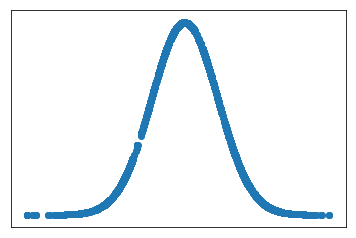

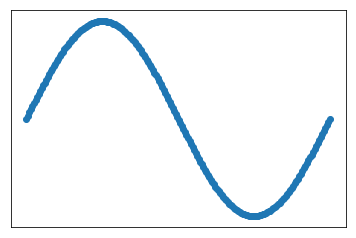

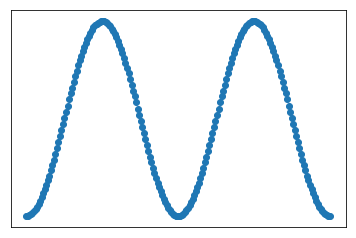

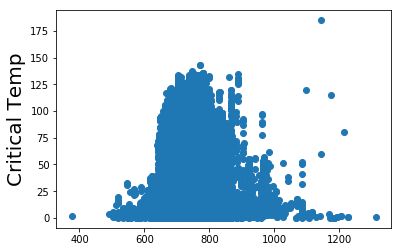

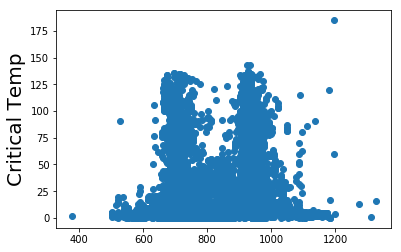

In [24]:
centermat=np.tile(X_train[gs_center],(X_train.shape[0],1))

#For example graphs, tick labels are unnecessary
fig=plt.figure()
plt.scatter([X_train[:,5]],[np.exp(-np.power((X_train[:,5]+.5-centermat[:,5])*5/centermat[:,5],2))])
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
fig.savefig('Gaussian.jpg')

fig=plt.figure()
plt.scatter(np.linspace(0,2*np.pi, num=200),[np.sin(np.linspace(0,2*np.pi, num=200))])
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
fig.savefig('sine.jpg')

fig=plt.figure()
plt.scatter(np.linspace(0,2*np.pi, num=200),[-np.cos(2*np.linspace(0,2*np.pi, num=200))+1])
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
fig.savefig('cos.jpg')


#Don't need an X label on these, as we don't know what they mean

fig=plt.figure()
plt.scatter([Data[:,13]],[Data[:,-1]])
plt.ylabel("Critical Temp",fontsize=20)
fig.savefig('Gaussian-like_Data.jpg')
fig.savefig('Gaussian-like_Data.jpg')

fig=plt.figure()
plt.scatter([Data[:,14]],[Data[:,-1]])
plt.ylabel("Critical Temp",fontsize=20)
fig.savefig('Gaussian-modal_like_Data.jpg')

In [15]:
y_temp_count=[]
temp=[]
for i in range(400):
    y_temp_count.append(len([j for j in Data[:,-1] if i/2<=j<=(i+1)/2]))
    temp.append(i/2)

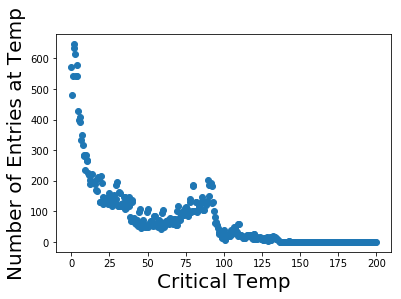

In [16]:
fig=plt.figure()
plt.scatter(temp,y_temp_count)
plt.xlabel("Critical Temp",fontsize=20)
plt.ylabel("Number of Entries at Temp",fontsize=20)
fig.savefig('Temp_Counts.jpg')

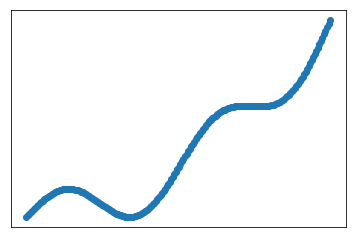

In [17]:
fig=plt.figure()
Xs=np.linspace(0,4*np.pi, num=200)
plt.scatter(Xs,[np.sin(Xs)+.05*Xs**2])
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
fig.savefig('Sin_plus_.5Xsquared.jpg')

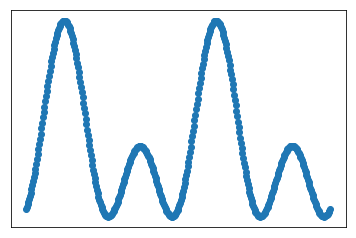

In [18]:
fig=plt.figure()
Xs=np.linspace(0,4*np.pi, num=400)
plt.scatter(Xs,[np.sin(Xs)-np.cos(2*Xs)+1])
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
fig.savefig('SinX_plus_cos2X_plus_1.jpg')

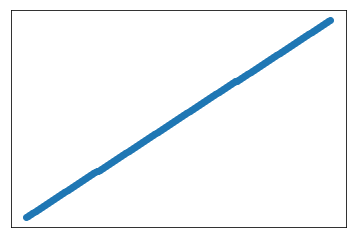

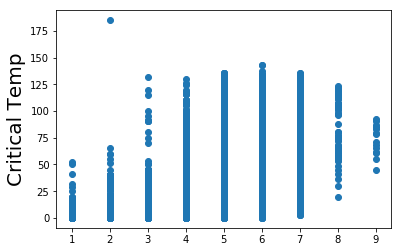

In [21]:
fig=plt.figure()
plt.scatter(np.linspace(0,2*np.pi, num=200),[np.linspace(0,2*np.pi, num=200)])
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
fig.savefig('x.jpg')


#Don't need an X label on these, as we don't know what they mean

fig=plt.figure()
plt.scatter([Data[:,0]],[Data[:,-1]])
plt.ylabel("Critical Temp",fontsize=20)
fig.savefig('X-like_Data.jpg')